In [23]:
# 8. Suorita taas ainakin minuutin mittainen havaintosarja, jonka aikana kävelet tasaista reipasta vauhtia ja samalla mittaat kiihtyvyyttä 
# Phyphox -sovelluksella tai käytä aiemmin askelmittarissa käytettyä dataa. Laske askeleesi kävelyn aikana ja merkitse tulos muistiin. 

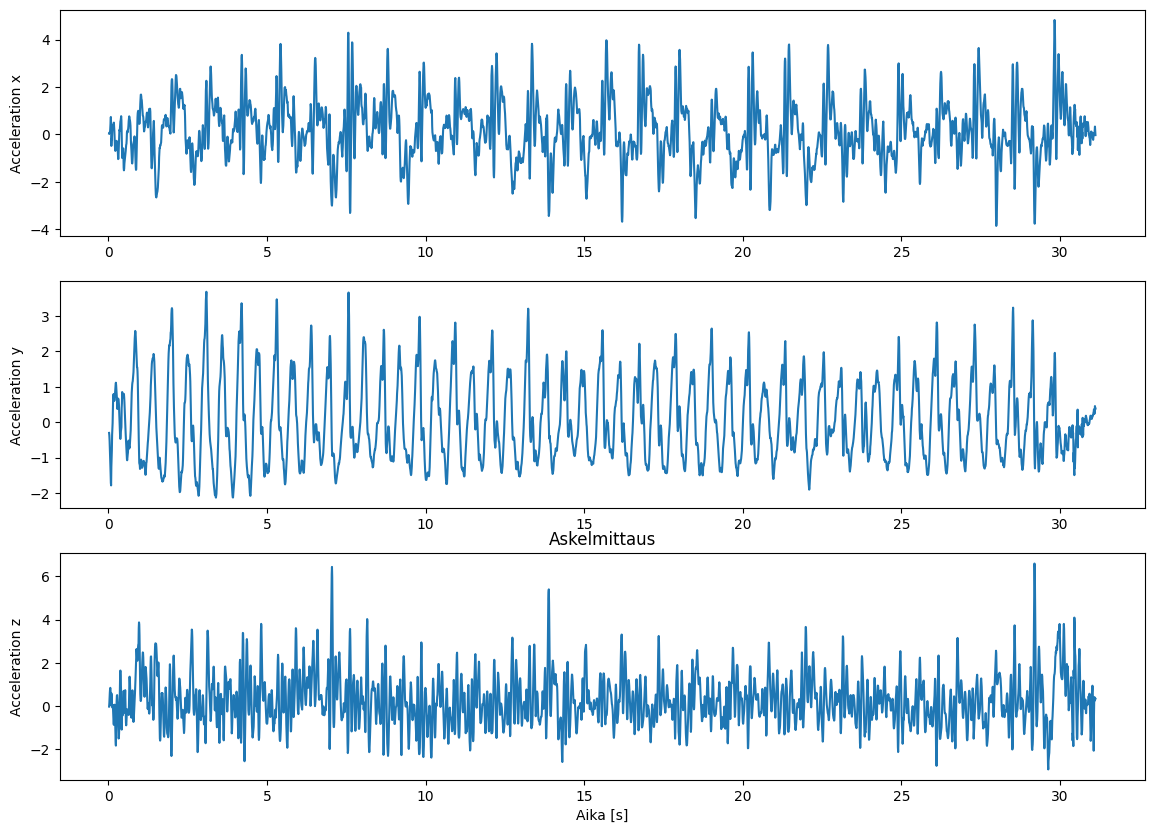

In [24]:
# 8.    
#          a) Tuo havaintodata Pythoniin ja piirrä sen kuvaaja. 
#             b) Tutki, miten askelet näkyvät havainnoissa jaksollisena liikkeenä
#             c) Määrittele, mikä kiihtyvyyden komponentti näyttää jaksollisuuden parhaiten ja valitse se seuraaviin kohtiin. 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./Data/askeldata.csv')

plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.ylabel('Acceleration x')
plt.subplot(3,1,2)
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.ylabel('Acceleration y')
plt.subplot(3,1,3)
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.ylabel('Acceleration z')
plt.title('Askelmittaus')
plt.xlabel('Aika [s]')
plt.show()

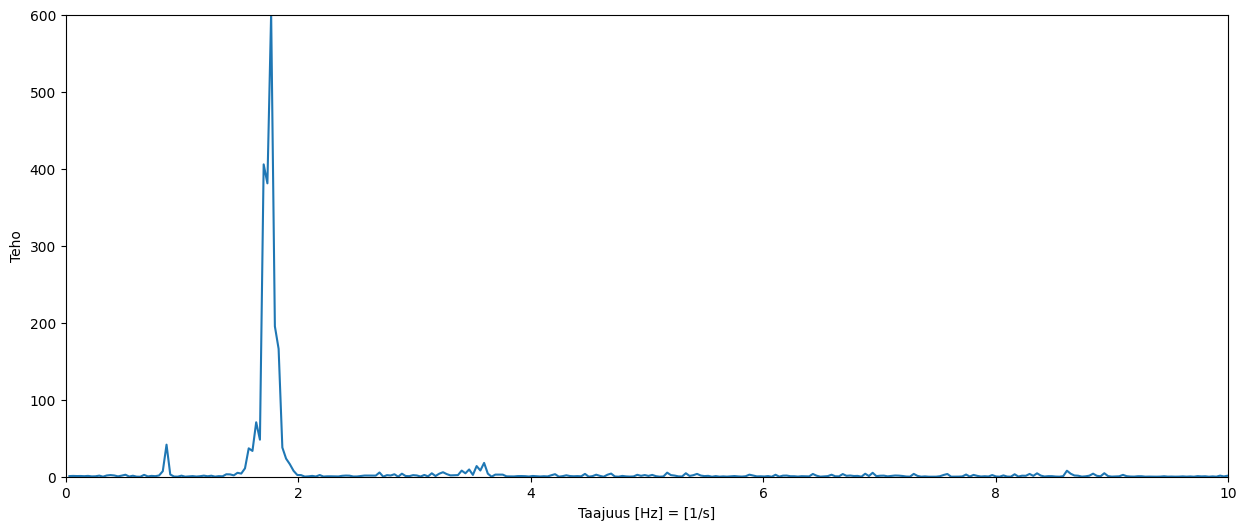

In [25]:
# 8. 
#             d)  Laske valitun komponentin Fourier-muunnos ja tehospektri. 
#             e)  Määrittele tehospektristä tehokkain taajuus. Vastaako tämä oletettua askeltaajuutta?
#             f)  Laske askelten kokonaismäärä askeltaajuuden perusteella. 

#Valitaan kiihtyvyyden y-komponentti
#df.head()
signal = df['Linear Acceleration y (m/s^2)']
t = df['Time (s)'] #Aika, alkaa nollasta, sekunteina
N = len(signal) #Havaintojen määrä
dt = np.max(t)/N #Näytteenottoväli (oletetaan vakioksi)

#Fourier-analyysi
fourier = np.fft.fft(signal,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Negatiivisten ja nollataajuuksien rajaus

plt.figure(figsize=(15,6))
plt.plot(freq[L],psd[L].real)
plt.xlabel('Taajuus [Hz] = [1/s]')
plt.ylabel('Teho')
plt.axis([0,10,0,600])
plt.show()


In [ ]:
f_max = freq[L][psd[L] == np.max(psd[L])][0] #Kävelymittauksen kiihtyvyyyden y-komponentin tehospektrin suurinta tehoa vastaava taajuus. 
#Eli toisinsanoen askelluksen dominoiva taajuus.
T = 1/f_max #Askeleeseen kuluva aika, eli jaksonaika (oletettaen, että dominoiva taajuus on askeltaajuus)
steps =  f_max*np.max(t) #Askelmäärä. Voi laskema myös np.max(t)/T

print('Dominoiva askeltaajuus on ',f_max)
print('Tätä vastaava jaksonaika (askelaika) on ', T)
print('Askelmäärä tällöin ', np.round(steps))

#Tässä oletetaan, että kävely on jatkuvaa koko mittauksen yli ja askeltaajuus on koko ajan sama.

#y-komponentissa dominoi askeltaajuus, x-komponentissa askelparin taajuus

Dominoiva askeltaajuus on  1.7676279020984795
Tätä vastaava jaksonaika (askelaika) on  0.5657299247272728
Askelmäärä tällöin  55.0


In [ ]:
# 9. Audiosignaali voidaan tuoda helposti Pythoniin .wav-muodossa seuraavasti

# from scipy.io import wavfile
# samplerate, data = wavfile.read('./Data/less_noisy_signal.wav')

# Vastaavasti voidaan signaali tallentaa


# scaled = np.int16(data / np.max(np.abs(data)) * 32767)
# write('signal.wav', samplerate, scaled)

# Lataa Moodlesta äänitiedosto noisy_signal.wav. Poista siitä kohina Fourier-analyysiä käyttäen. Tallenna puhdistettu tiedosto ja varmista kuuntelemalla, että menetelmä toimii. 

Näytteenottotaajuus on  48000


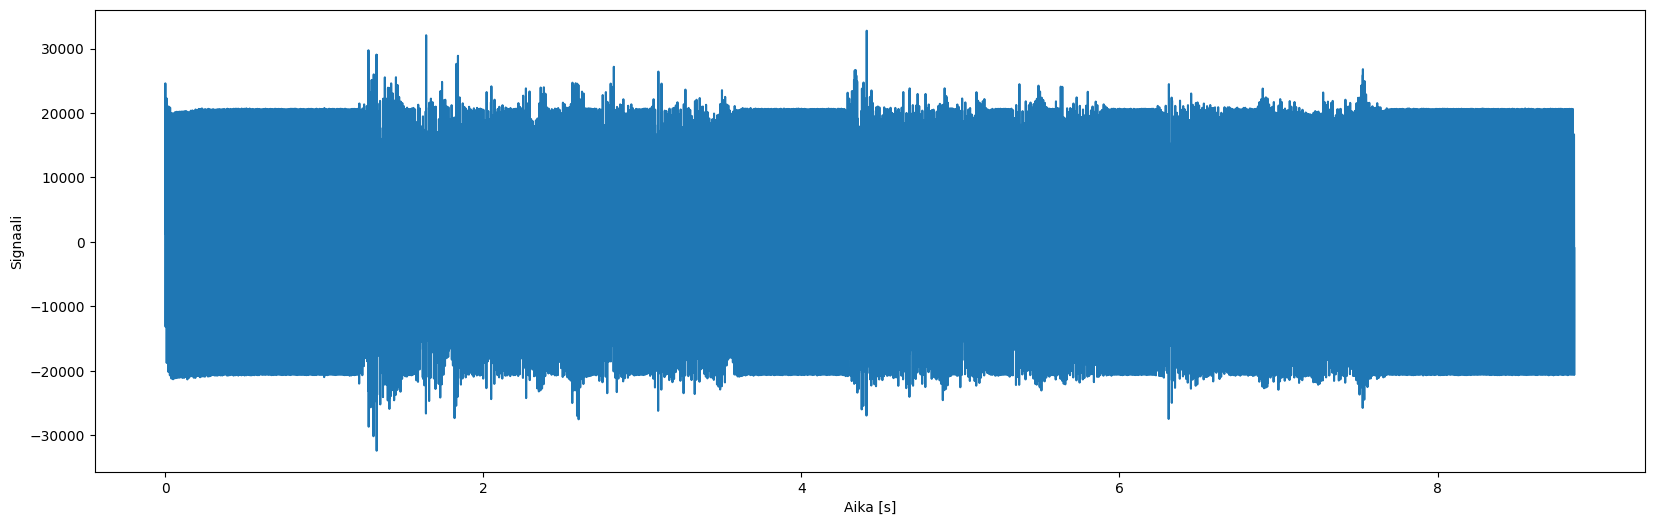

In [34]:
from scipy.io import wavfile
samplerate, data = wavfile.read('./Data/less_noisy_signal.wav')
print('Näytteenottotaajuus on ',samplerate)
dt = 1/samplerate #Näytteenottoväli
N = len(data)
#Tutkitaan signaalia ja piirretään sen kuvaaja
#Signaalin pituus on 425280 pistettä

#Määritellään signaalin aika
t = np.arange(0,N*dt,dt) #(alkupiste, loppupiste, välimatka)

plt.figure(figsize=(20,6))
plt.plot(t,data)
plt.ylabel('Signaali')
plt.xlabel('Aika [s]')
plt.show()


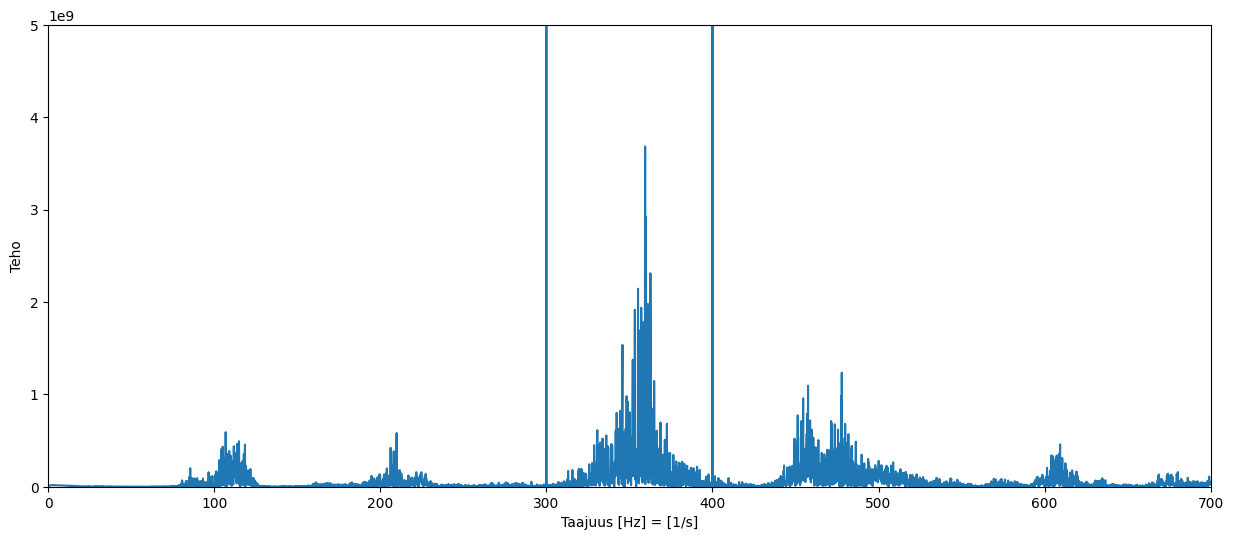

In [41]:
#Fourier-analyysi
fourier = np.fft.fft(data,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Negatiivisten ja nollataajuuksien rajaus

plt.figure(figsize=(15,6))
plt.plot(freq[L],psd[L].real)
plt.xlabel('Taajuus [Hz] = [1/s]')
plt.ylabel('Teho')
plt.axis([0,700,0,5e9])
plt.show()

#Ihminen aistii eri taajuuksia, toisin sanoen äänenkorkeuksia, noin 20  - 20 000 Hz
#Tämä signaali voi näytteistyksen puolesta sisältää näitä kaikkia taajuuksia.

#Puheäänen perustaajuus ihmisellä on noin 100 Hz - 500 Hz

#Nähdään, että signaalissa on massiiviset piikit 300hz ja 400hz kohdalla. Nämä liittyvät epäilemättä selvästi kuuluvuun häiriöihin. 

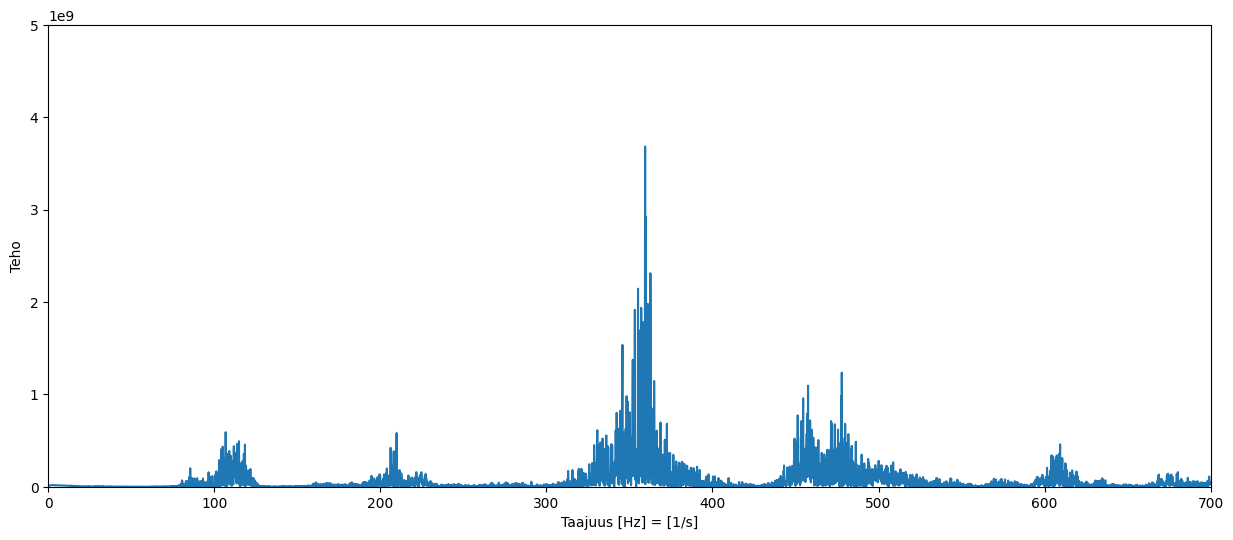

In [42]:
#Poistetaan 300 ja 400Hz taajuuksilla sijaitsevat piikit.
fourier_clean = fourier.copy()
#Poistetaan tehokkaimmat taajuudet
fourier_clean[psd > 5e9] = 0

#Piirretään puhdistetun signaalin tehospektri
psd = fourier_clean*np.conj(fourier_clean)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Negatiivisten ja nollataajuuksien rajaus

plt.figure(figsize=(15,6))
plt.plot(freq[L],psd[L].real)
plt.xlabel('Taajuus [Hz] = [1/s]')
plt.ylabel('Teho')
plt.axis([0,700,0,5e9])
plt.show()

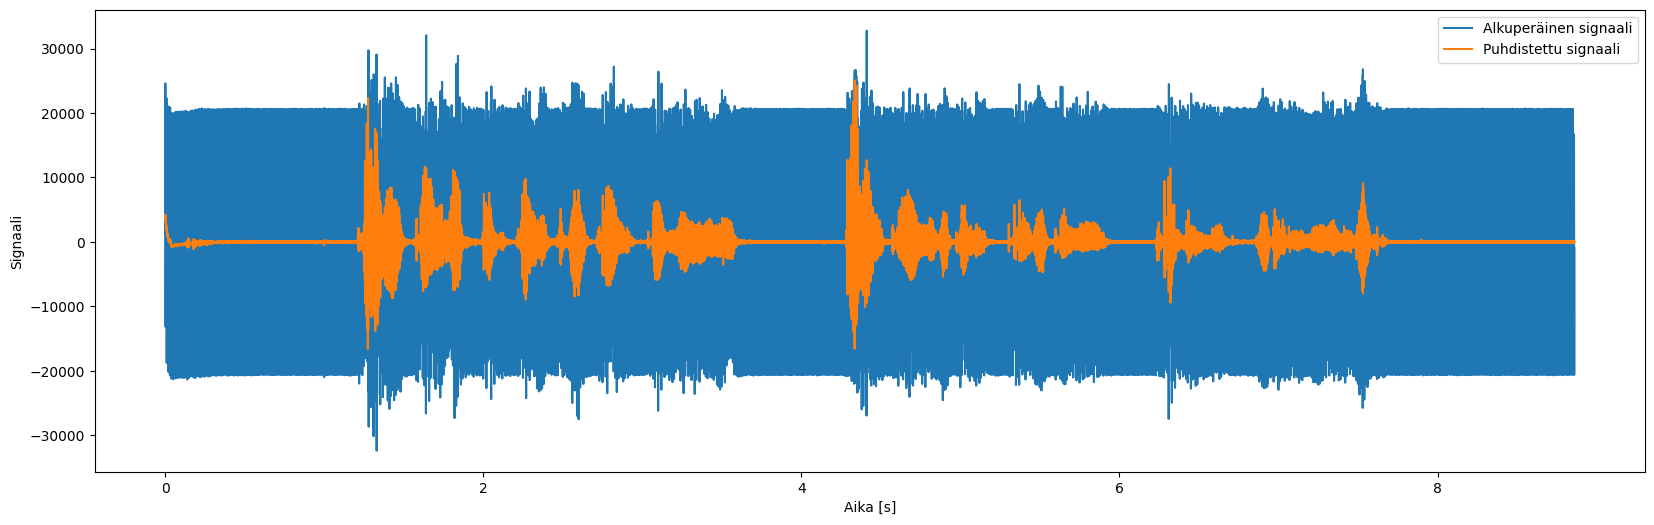

In [46]:
#Palautetaan signaali:
clean_signal = np.fft.ifft(fourier_clean).real

plt.figure(figsize=(20,6))
plt.plot(t,data)
plt.plot(t,clean_signal)
plt.ylabel('Signaali')
plt.xlabel('Aika [s]')
plt.legend(['Alkuperäinen signaali','Puhdistettu signaali'])
plt.show()

In [47]:
from scipy.io.wavfile import write
scaled = np.int16(clean_signal / np.max(np.abs(clean_signal)) * 32767)
write('clean_signal.wav', samplerate, scaled)